In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-no2-all-models-amsterdam/Predicting NO2-AllModelsAmsterdam100_xy.csv
/kaggle/input/predictedno2bayreuth-2023/PredictedNO2_BayreuthSquare.csv
/kaggle/input/predictedno2utrecht-2023/PredictedNO2_UtrechtSquare.csv
/kaggle/input/predictedno2hamburg-2023/PredictedNO2_HamburgSquare.csv


In [2]:
Amsterdam = pd.read_csv(r'../input/predicting-no2-all-models-amsterdam/Predicting NO2-AllModelsAmsterdam100_xy.csv', sep=',')
Hamburg = pd.read_csv(r'/kaggle/input/predictedno2hamburg-2023/PredictedNO2_HamburgSquare.csv', sep = ';')
Bayreuth = pd.read_csv(r'/kaggle/input/predictedno2bayreuth-2023/PredictedNO2_BayreuthSquare.csv', sep=';')
Utrecht = pd.read_csv(r'/kaggle/input/predictedno2utrecht-2023/PredictedNO2_UtrechtSquare.csv', sep=';')

In [3]:
Amsterdam.head()

,Unnamed: 0,nightlight_450,nightlight_3150,population_1000,population_3000,road_class_2_25,road_class_3_3000,road_class_3_300,trop_mean_filt,BldDen100,NDVI,trafBuf25,trafBuf50,Longitude,Latitude,predicted_NO2_RF,predicted_NO2_LASSO,predicted_NO2_RIDGE,predicted_NO2_LightGBM,predicted_NO2_XGBoost
0,0,35.940372,22.422291,3617.017578,12366.87500,0.0,68492.17969,2938.124756,0.000078,0.469889,3526,0.0,0.0,4.623443,52.200544,20.242203,20.213005,21.428299,19.633580,18.117218
1,1,35.940372,22.422291,3617.017578,12366.87500,0.0,68074.17969,3049.754639,0.000078,0.678183,3526,0.0,0.0,4.624902,52.200598,20.251307,20.666314,22.162748,19.809809,18.043394
2,2,35.940372,22.422291,3661.374756,12369.04102,0.0,68264.24219,3246.867920,0.000078,0.817256,3526,0.0,0.0,4.626361,52.200652,20.307211,21.114060,22.754499,20.789909,19.293121
3,3,35.940372,22.422291,3671.354492,12369.52832,0.0,69195.90625,3974.607422,0.000078,0.817167,3526,0.0,0.0,4.627820,52.200707,20.522166,21.986886,23.299931,22.195651,18.969490
4,4,19.918125,22.502562,3671.354492,12369.52832,0.0,70203.03125,4186.303223,0.000078,0.806396,3519,0.0,0.0,4.629279,52.200761,20.437377,21.205409,22.406520,22.844288,19.061409


In [4]:
Bayreuth.head()

,predicted_NO2_RF,predicted_NO2_LASSO,predicted_NO2_RIDGE,predicted_NO2_LightGBM,predicted_NO2_XGBoost
0,10.753509,13.075421,11.810458,8.543606,8.359164
1,11.361687,14.725188,14.112172,9.986432,11.511805
2,12.722103,15.571753,15.069877,13.382312,13.742922
3,12.426766,15.523418,14.683643,13.442220,14.784616
4,11.767294,13.242730,12.248009,11.582613,13.170686


## Rename column for unique identifier, per city

In [5]:
Amsterdam = Amsterdam.rename(columns ={"Unnamed: 0": "FID"  })
Bayreuth = Bayreuth.rename(columns ={"Unnamed: 0": "FID"  })
Hamburg = Hamburg.rename(columns ={"Unnamed: 0": "FID"  })
Utrecht = Utrecht.rename(columns ={"Unnamed: 0": "FID"  })

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Amsterdam.columns

Index(['FID', 'nightlight_450', 'nightlight_3150', 'population_1000',
       'population_3000', 'road_class_2_25', 'road_class_3_3000',
       'road_class_3_300', 'trop_mean_filt', 'BldDen100', 'NDVI', 'trafBuf25',
       'trafBuf50', 'Longitude', 'Latitude', 'predicted_NO2_RF',
       'predicted_NO2_LASSO', 'predicted_NO2_RIDGE', 'predicted_NO2_LightGBM',
       'predicted_NO2_XGBoost'],
      dtype='object')

In [8]:
Hamburg.columns

Index(['predicted_NO2_RF', 'predicted_NO2_LASSO', 'predicted_NO2_RIDGE',
       'predicted_NO2_LightGBM', 'predicted_NO2_XGBoost'],
      dtype='object')

### assigning an indicator like Location to distinguish your three sets of data

In [9]:
Amsterdam = Amsterdam[['predicted_NO2_RF', 'predicted_NO2_LightGBM',
       'predicted_NO2_XGBoost', 'predicted_NO2_RIDGE',
       'predicted_NO2_LASSO']].assign(location='Amsterdam')

Bayreuth = Bayreuth[['predicted_NO2_RF', 'predicted_NO2_LightGBM',
       'predicted_NO2_XGBoost', 'predicted_NO2_RIDGE',
       'predicted_NO2_LASSO']].assign(location='Bayreuth')

Hamburg = Hamburg[['predicted_NO2_RF', 'predicted_NO2_LightGBM',
       'predicted_NO2_XGBoost', 'predicted_NO2_RIDGE',
       'predicted_NO2_LASSO']].assign(location='Hamburg')

Utrecht = Utrecht[['predicted_NO2_RF', 'predicted_NO2_LightGBM',
       'predicted_NO2_XGBoost', 'predicted_NO2_RIDGE',
       'predicted_NO2_LASSO']].assign(location='Utrecht')


In [10]:
Amsterdam.columns

Index(['predicted_NO2_RF', 'predicted_NO2_LightGBM', 'predicted_NO2_XGBoost',
       'predicted_NO2_RIDGE', 'predicted_NO2_LASSO', 'location'],
      dtype='object')

## convert multiple columns into one per city

In [11]:
cities = pd.concat([Amsterdam, Bayreuth, Hamburg, Utrecht])

In [12]:
cities_melt = pd.melt(cities, id_vars=['location'], var_name=['Model'])

In [13]:
print(cities_melt)

          location                Model      value
0        Amsterdam     predicted_NO2_RF  20.242203
1        Amsterdam     predicted_NO2_RF  20.251307
2        Amsterdam     predicted_NO2_RF  20.307211
3        Amsterdam     predicted_NO2_RF  20.522166
4        Amsterdam     predicted_NO2_RF  20.437377
...            ...                  ...        ...
1389020    Utrecht  predicted_NO2_LASSO  11.458487
1389021    Utrecht  predicted_NO2_LASSO  11.586470
1389022    Utrecht  predicted_NO2_LASSO  11.616399
1389023    Utrecht  predicted_NO2_LASSO  10.807627
1389024    Utrecht  predicted_NO2_LASSO  11.075286

[1389025 rows x 3 columns]


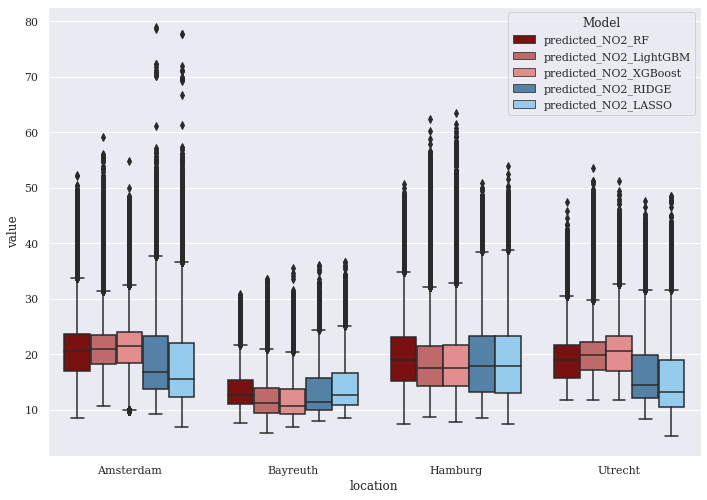

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#define font
plt.rcParams["font.family"] = "serif"

Model_colors=["darkred","indianred","lightcoral","steelblue","lightskyblue"]
ax = sns.boxplot(x="location", y="value", hue="Model", data=cities_melt, palette=Model_colors)    

plt.savefig('Distribution predicted NO2 per model', bbox_inches='tight',
           facecolor=(1, 1, 1))

plt.show()